In [1]:
import sys
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../')
from envir import config

/home/cusp/yg833/.conda/envs/birdsVE3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Load Data

In [2]:
df = pd.read_csv(config.dataFol+'all_cleaned_wsp_sonyc_birds.csv')

#### Processing Data
* convert timestamps from UTC to US/Eastern

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp']) \
    .dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month
df['day'] = pd.DatetimeIndex(df['timestamp']).day
df['hour'] = pd.DatetimeIndex(df['timestamp']).hour

In [4]:
df.shape

(756880, 33)

In [5]:
df.head()

,timestamp,sonyc_sensor_id,sonyc_sensor_name,dBAS_lin_mean,l1,l10,l5,l90,count_of_positive_predictions,pct_positive_predictions,...,s_19WashingtonSquareNorth,s_silverLab,s_juanCarlos,s_shimkinReadingRoom,s_4WashingtonSquareNorth,s_kimmelCenter,year,month,day,hour
0,2017-03-02 02:00:00-05:00,b827eb815321,19 Washington Square North,59.166330,66.6600,64.664,65.864500,52.550,0.0,0.04918,...,1,0,0,0,0,0,2017,3,2,2
1,2017-03-02 02:00:00-05:00,b827eb0fedda,Juan Carlos,53.477207,61.8205,53.870,55.319000,51.549,0.0,0.03333,...,0,0,1,0,0,0,2017,3,2,2
2,2017-03-02 02:00:00-05:00,b827eb1685c7,Shimkin Reading Room,61.856247,70.3921,63.218,68.984000,58.510,0.0,0.00000,...,0,0,0,1,0,0,2017,3,2,2
3,2017-03-02 02:01:00-05:00,b827eb815321,19 Washington Square North,57.641624,65.6847,61.611,63.781998,52.209,0.0,0.04918,...,1,0,0,0,0,0,2017,3,2,2
4,2017-03-02 02:01:00-05:00,b827eb0fedda,Juan Carlos,60.136166,68.6936,64.030,67.075000,52.408,0.0,0.03333,...,0,0,1,0,0,0,2017,3,2,2


In [6]:
df.dtypes

timestamp                        datetime64[ns, US/Eastern]
sonyc_sensor_id                                      object
sonyc_sensor_name                                    object
dBAS_lin_mean                                       float64
l1                                                  float64
l10                                                 float64
l5                                                  float64
l90                                                 float64
count_of_positive_predictions                       float64
pct_positive_predictions                            float64
avg_mtr_#/km/h                                      float64
avg_mt_#/km                                         float64
avg_height_m                                        float64
temp_celcius                                        float64
dewp_celcius                                        float64
rh_percentage                                       float64
wind_dir                                

In [12]:
df.sonyc_sensor_name.unique()

array(['19 Washington Square North', 'Juan Carlos',
       'Shimkin Reading Room', '4 Washington Square North',
       'Kimmel Center'], dtype=object)

#### Examining YAMNet Data
* find the sonyc sensor name for easy comprehension


In [7]:
yamnetByHour = df[['sonyc_sensor_name', 'pct_positive_predictions',
                       'year', 'month', 'day', 'hour']].drop_duplicates()
yamnetByHour = yamnetByHour[(yamnetByHour.month >=3) & (yamnetByHour.month <=5)]
yamnetByHour['year'] = yamnetByHour.year.astype(str)
yamnetByHour['month'] = yamnetByHour.month.apply(lambda x: '{0:0>2}'.format(x))
yamnetByHour['day'] = yamnetByHour.day.apply(lambda x: '{0:0>2}'.format(x))
yamnetByHour['hour'] = yamnetByHour.hour.apply(lambda x: '{0:0>2}'.format(x))
yamnetByHour['datetime'] = yamnetByHour['year']+'-'+yamnetByHour['month']+ \
    '-'+yamnetByHour['day']+' '+yamnetByHour['hour']+':00'
yamnetByHour['datetime'] = pd.to_datetime(yamnetByHour.datetime)
yamnetByHour.head()

,sonyc_sensor_name,pct_positive_predictions,year,month,day,hour,datetime
0,19 Washington Square North,0.04918,2017,03,02,02,2017-03-02 02:00:00
1,Juan Carlos,0.03333,2017,03,02,02,2017-03-02 02:00:00
2,Shimkin Reading Room,0.00000,2017,03,02,02,2017-03-02 02:00:00
188,19 Washington Square North,0.00000,2017,03,02,03,2017-03-02 03:00:00
189,Juan Carlos,0.00000,2017,03,02,03,2017-03-02 03:00:00


#### pct_positive_predictions by sensor by month by hour

In [8]:
yamnetMonthly = yamnetByHour.groupby(['sonyc_sensor_name','year','month','hour']) \
    .agg(['mean', 'std']).reset_index()
yamnetMonthly['hour_est'] = yamnetMonthly.hour.astype(float)
yamnetMonthly.columns = ["_".join(x) for x in yamnetMonthly.columns.ravel()]
yamnetMonthly.rename(columns={'sonyc_sensor_name_':'sensor', 'year_':'year', 
                             'month_':'month', 'hour_est_':'hour_est',
                             'hour_':'hour'}, inplace=True)
yamnetMonthly.head()

,sensor,year,month,hour,pct_positive_predictions_mean,pct_positive_predictions_std,hour_est
0,19 Washington Square North,2017,03,00,0.000000,0.000000,0.0
1,19 Washington Square North,2017,03,01,0.012262,0.033909,1.0
2,19 Washington Square North,2017,03,02,0.020446,0.029078,2.0
3,19 Washington Square North,2017,03,03,0.028890,0.038859,3.0
4,19 Washington Square North,2017,03,04,0.042116,0.044732,4.0


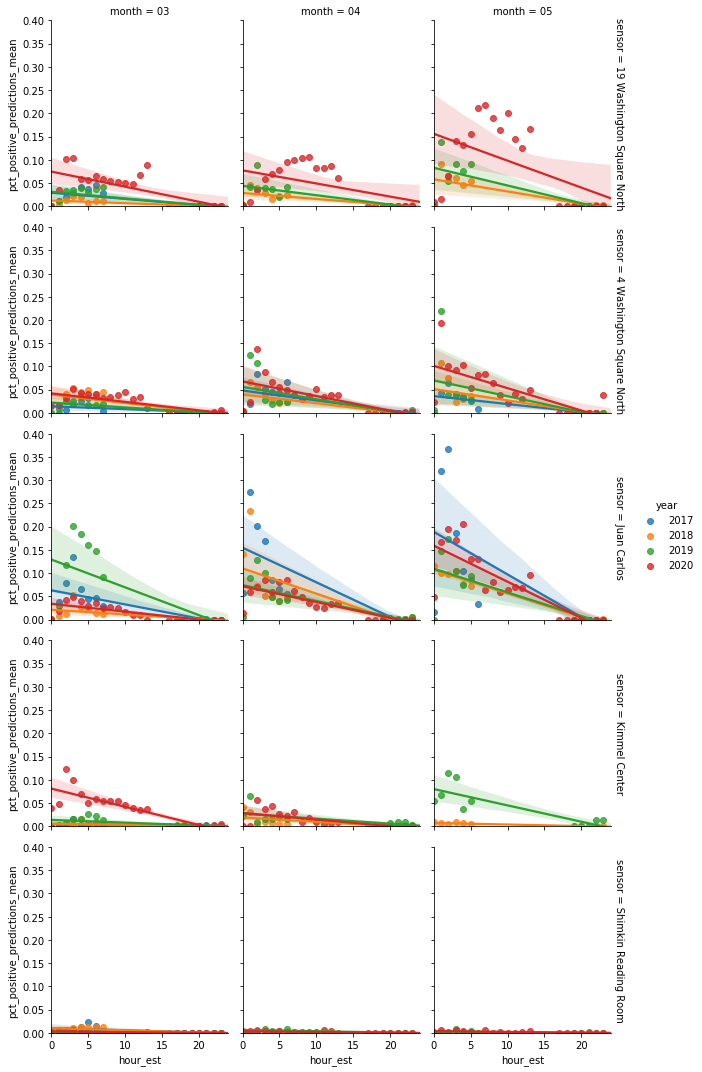

In [9]:
g = sns.FacetGrid(yamnetMonthly, row='sensor', 
                  col="month", hue='year', ylim=(0, 0.4), xlim=(0,24),
                  margin_titles=True)
g.map(sns.regplot, "hour_est", "pct_positive_predictions_mean")
g.add_legend()
g.savefig("../figures/yamnet_avg_by_hour.png")

#### Looking at Correlation for `pct_positive_predictions` and `avg_mtr_#/km/h`

In [13]:
cols = ['pct_positive_predictions', 'avg_mtr_#/km/h']

dfList = dict(list(df.groupby('sonyc_sensor_name')))
for key in dfList.keys():
    dfList[key].set_index('timestamp', inplace=True)

19 Washington Square North
4 Washington Square North
Juan Carlos
Kimmel Center
Shimkin Reading Room


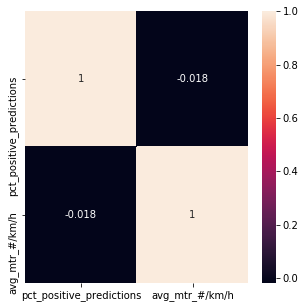

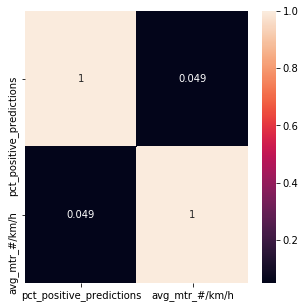

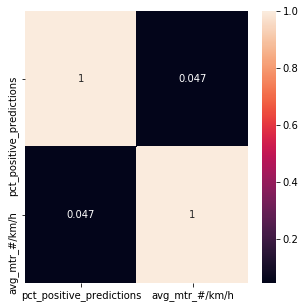

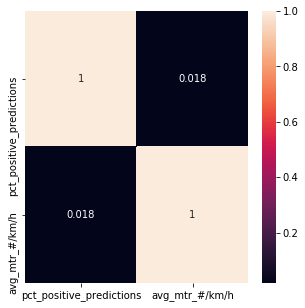

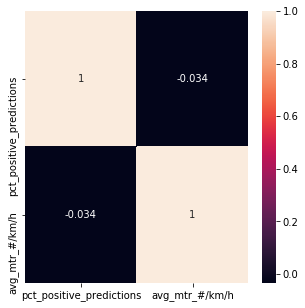

In [26]:
for key in dfList.keys():
    corrMatrix = dfList[key][cols].corr()
    plt.figure(figsize=(5,5))
    print(key)
    sns.heatmap(corrMatrix, annot=True)

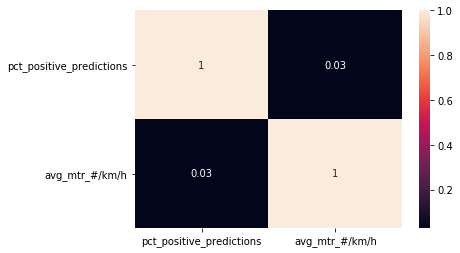

In [24]:
sns.heatmap(df[cols].corr(), annot=True)

In [28]:
df.columns

Index(['timestamp', 'sonyc_sensor_id', 'sonyc_sensor_name', 'dBAS_lin_mean',
       'l1', 'l10', 'l5', 'l90', 'count_of_positive_predictions',
       'pct_positive_predictions', 'avg_mtr_#/km/h', 'avg_mt_#/km',
       'avg_height_m', 'temp_celcius', 'dewp_celcius', 'rh_percentage',
       'wind_dir', 'wind_speed_mph', 'sea_level_pressure_mb',
       'precipitation_mm', 'visibility_miles', 'gust_mph',
       'peak_wind_gust_mph', 's_19WashingtonSquareNorth', 's_silverLab',
       's_juanCarlos', 's_shimkinReadingRoom', 's_4WashingtonSquareNorth',
       's_kimmelCenter', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [45]:
df[df.sonyc_sensor_name!='Shimkin Reading Room'][['dBAS_lin_mean', 'l1', 'l10', 'l5', 'l90', 'count_of_positive_predictions',
   'pct_positive_predictions', 'avg_mtr_#/km/h', 'avg_mt_#/km',
   'avg_height_m', 'temp_celcius', 'dewp_celcius', 'rh_percentage',
   'wind_dir', 'wind_speed_mph', 'sea_level_pressure_mb',
   'precipitation_mm', 'visibility_miles', 'gust_mph',
   'peak_wind_gust_mph', 's_19WashingtonSquareNorth', 's_juanCarlos', 
    's_4WashingtonSquareNorth', 's_kimmelCenter']].corr()

,dBAS_lin_mean,l1,l10,l5,l90,count_of_positive_predictions,pct_positive_predictions,avg_mtr_#/km/h,avg_mt_#/km,avg_height_m,...,wind_speed_mph,sea_level_pressure_mb,precipitation_mm,visibility_miles,gust_mph,peak_wind_gust_mph,s_19WashingtonSquareNorth,s_juanCarlos,s_4WashingtonSquareNorth,s_kimmelCenter
dBAS_lin_mean,1.000000,0.918957,0.958788,0.944508,0.671043,-0.036518,-0.109887,-0.016346,-0.012551,0.033077,...,0.094367,-0.071569,0.150167,-0.120423,0.095155,0.087440,0.152641,0.025684,-0.124539,-0.064431
l1,0.918957,1.000000,0.905389,0.956594,0.442726,-0.030046,-0.088314,-0.040814,-0.016328,0.043700,...,0.076788,-0.027395,0.123806,-0.102764,0.068760,0.077273,0.188666,0.009000,-0.135493,-0.074283
l10,0.958788,0.905389,1.000000,0.971620,0.566948,-0.033951,-0.102750,-0.025336,-0.005649,0.044002,...,0.086507,-0.056040,0.148338,-0.120345,0.085518,0.080261,0.211787,-0.002769,-0.147164,-0.073694
l5,0.944508,0.956594,0.971620,1.000000,0.491923,-0.030656,-0.089839,-0.032998,-0.013773,0.041761,...,0.080750,-0.044802,0.139667,-0.114152,0.076533,0.080133,0.224257,-0.008343,-0.146298,-0.082991
l90,0.671043,0.442726,0.566948,0.491923,1.000000,-0.038131,-0.118083,0.036076,0.009017,-0.008152,...,0.102355,-0.145035,0.132661,-0.101303,0.124620,0.085659,-0.075675,0.053984,0.006602,0.017519
count_of_positive_predictions,-0.036518,-0.030046,-0.033951,-0.030656,-0.038131,1.000000,0.336860,0.011102,0.022938,-0.014901,...,-0.022515,-0.000565,-0.005853,0.000826,-0.008585,-0.011243,-0.011686,0.037098,-0.013400,-0.014843
pct_positive_predictions,-0.109887,-0.088314,-0.102750,-0.089839,-0.118083,0.336860,1.000000,0.028576,0.080676,-0.049843,...,-0.079301,-0.010384,-0.025074,0.002433,-0.040567,-0.038823,-0.018391,0.138444,-0.055507,-0.079134
avg_mtr_#/km/h,-0.016346,-0.040814,-0.025336,-0.032998,0.036076,0.011102,0.028576,1.000000,0.285511,0.115785,...,-0.103757,-0.064081,-0.027064,-0.020584,-0.048796,-0.036191,-0.004254,0.012642,0.012574,-0.025496
avg_mt_#/km,-0.012551,-0.016328,-0.005649,-0.013773,0.009017,0.022938,0.080676,0.285511,1.000000,0.172986,...,-0.158637,-0.134989,0.037204,-0.084973,-0.133210,-0.137698,-0.020432,0.040017,0.056190,-0.092157
avg_height_m,0.033077,0.043700,0.044002,0.041761,-0.008152,-0.014901,-0.049843,0.115785,0.172986,1.000000,...,-0.114709,0.023982,0.050324,-0.155496,-0.111330,-0.054404,-0.014108,0.015135,0.007211,-0.010153


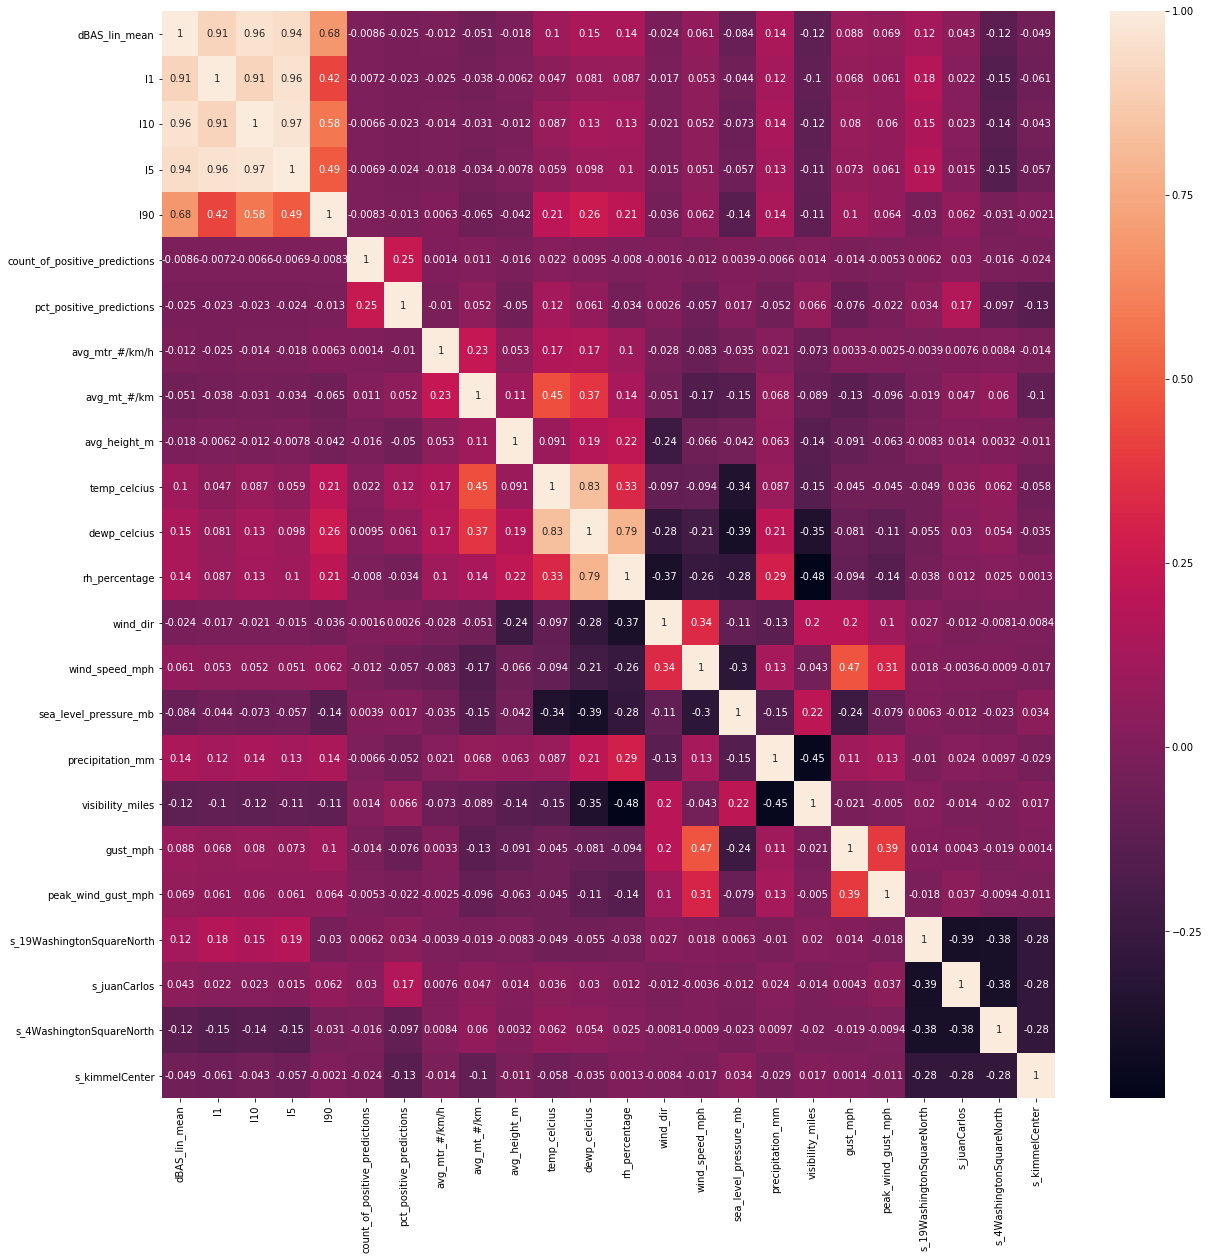

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(df[(df.hour >=4) & (df.hour <=8) & (df.sonyc_sensor_name!='Shimkin Reading Room')][['dBAS_lin_mean', 'l1', 'l10', 'l5', 'l90', 'count_of_positive_predictions',
   'pct_positive_predictions', 'avg_mtr_#/km/h', 'avg_mt_#/km',
   'avg_height_m', 'temp_celcius', 'dewp_celcius', 'rh_percentage',
   'wind_dir', 'wind_speed_mph', 'sea_level_pressure_mb',
   'precipitation_mm', 'visibility_miles', 'gust_mph',
   'peak_wind_gust_mph', 's_19WashingtonSquareNorth', 's_juanCarlos', 
    's_4WashingtonSquareNorth', 's_kimmelCenter']].corr(), annot=True)
plt.savefig("../figures/all_metrics_corr.png")

array([0])